<a href="https://colab.research.google.com/github/Ashi-Jain/helmet_vest/blob/main/Copy_of_Custom_Object_Detection_using_TensorFlow_js_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Setup Training Configuration**
Configure all the necessary parameters for training.

In [1]:
pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 5.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
NUM_TRAIN_STEPS = 500
MODEL_TYPE = 'ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18'
CONFIG_TYPE = 'ssd_mobilenet_v1_quantized_300x300_coco14_sync'

import os


CHECKPOINT_PATH = '/content/checkpoint'
OUTPUT_PATH     = '/content/output'
EXPORTED_PATH   = '/content/exported'
DATA_PATH       = '/content/data'

LABEL_MAP_PATH    = os.path.join(DATA_PATH, 'labelmap.pbtxt')
TRAIN_RECORD_PATH = os.path.join(DATA_PATH, 'train.record')
VAL_RECORD_PATH   = os.path.join(DATA_PATH, 'val.record')

#### **Mount Google Drive**
To access the dataset stored on your Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Install the TensorFlow Object Detection API**
Install and setup TensorFlow Object Detection API, Protobuf and other necessary dependencies.


##### **Dependencies**
Most of the dependencies required come preloaded in Google Colab. The only additional package we need to install is TensorFlow.js, which is used for converting our trained model to a model that is compatible for the web.

##### **Protocol Buffers**
The TensorFlow Object Detection API relies on what are called `protocol buffers` (also known as `protobufs`). Protobufs are a language neutral way to describe information. That means you can write a protobuf once and then compile it to be used with other languages, like Python, Java or C.

The `protoc` command used below is compiling all the protocol buffers in the `object_detection/protos` folder for Python.

##### **Environment**
To use the object detection api we need to add it to our `PYTHONPATH` along with `slim` which contains code for training and evaluating several widely used Convolutional Neural Network (CNN) image classification models.

In [3]:
%tensorflow_version 1.x
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/cloud-annotations/models

!pip install cloud-annotations==0.0.4
!pip install tf_slim
!pip install lvis
!pip install --no-deps tensorflowjs==1.4.0

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

pwd = os.getcwd()
os.environ['PYTHONPATH'] += f':{pwd}:{pwd}/slim'

TensorFlow 1.x selected.
Cloning into 'models'...
remote: Enumerating objects: 2282, done.
remote: Counting objects: 100% (2282/2282), done.
remote: Compressing objects: 100% (1930/1930), done.
remote: Total 2282 (delta 523), reused 1239 (delta 326), pack-reused 0
Receiving objects: 100% (2282/2282), 30.58 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (523/523), done.
     |████████████████████████████████| 352 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 
/content/models/research


#### **Test the setup**
Run the model builder test to verify if everything is setup successfully.

In [4]:
!python object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_w

#### **Copy the dataset folder from Google Drive.**
Get the dataset of images and annotations saved on your Drive.

In [5]:
!unzip /content/drive/MyDrive/TFJS-Custom-Detection -d /content/
%cd /content/
%mkdir data

Archive:  /content/drive/MyDrive/TFJS-Custom-Detection.zip
   creating: /content/TFJS-Custom-Detection/annotations/
  inflating: /content/TFJS-Custom-Detection/annotations/1.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/10.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/11.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/12.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/13.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/14.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/15.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/16.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/17.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/18.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/19.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/2.xml  
  inflating: /content/TFJS-Custom-Detection/annotations/20.xml  
  inflating: /content/TFJS-Custom-Detecti

#### **Load the xml_to_csv.py**

In [6]:
!wget https://raw.githubusercontent.com/NSTiwari/TensorFlow.js-Custom-Object-Detection/master/xml_to_csv.py -P /content/TFJS-Custom-Detection/

--2022-03-05 07:29:41--  https://raw.githubusercontent.com/NSTiwari/TensorFlow.js-Custom-Object-Detection/master/xml_to_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223 (1.2K) [text/plain]
Saving to: ‘/content/TFJS-Custom-Detection/xml_to_csv.py’

xml_to_csv.py       100%[===================>]   1.19K  --.-KB/s    in 0s      

2022-03-05 07:29:41 (42.4 MB/s) - ‘/content/TFJS-Custom-Detection/xml_to_csv.py’ saved [1223/1223]



#### **Convert XML annotations into CSV**
All the PascalVOC labels are converted into a CSV file for training and testing data.

In [7]:
%cd /content/
!python TFJS-Custom-Detection/xml_to_csv.py

/content
Successfully converted xml to csv.
Successfully converted xml to csv.


#### **Create labelmap.pbtxt file inside the data folder** 
Consider the following example:
```
item {
  name: "cat"
  id: 1
}
 
item {
  name: "dog"
  id: 2
}
 
item {
  name: "fish"
  id: 3
}


#### **Create TFRecord**

Download the generate_tf_record.py file

In [8]:
!wget https://raw.githubusercontent.com/NSTiwari/TensorFlow.js-Custom-Object-Detection/master/generate_tf_records.py -P /content/

--2022-03-05 07:31:18--  https://raw.githubusercontent.com/NSTiwari/TensorFlow.js-Custom-Object-Detection/master/generate_tf_records.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5136 (5.0K) [text/plain]
Saving to: ‘/content/generate_tf_records.py’

generate_tf_records 100%[===================>]   5.02K  --.-KB/s    in 0s      

2022-03-05 07:31:19 (42.4 MB/s) - ‘/content/generate_tf_records.py’ saved [5136/5136]



In [9]:
!python generate_tf_records.py -l /content/data/labelmap.pbtxt -o data/train.record -i TFJS-Custom-Detection/images -csv TFJS-Custom-Detection/train_labels.csv
!python generate_tf_records.py -l /content/data/labelmap.pbtxt -o data/val.record -i TFJS-Custom-Detection/images -csv TFJS-Custom-Detection/val_labels.csv

INFO:Successfully created the TFRecords: data/train.record
INFO:Successfully created the TFRecords: data/val.record


#### **Navigate to models/research directory**

In [10]:
%cd /content/models/research

/content/models/research


#### **Download a base model**
Training a model from scratch can take a lot of computation time. Instead, we choose to apply Transfer Learning on a pre-trained model. Transfer Learning helps to decrease computations and time, of course, to a great extent. The base model we'll be using is the MobileNet model which is very fast.

In [11]:
import os
import tarfile

import six.moves.urllib as urllib

download_base = 'http://download.tensorflow.org/models/object_detection/'
model = MODEL_TYPE + '.tar.gz'
tmp = '/content/checkpoint.tar.gz'

if not (os.path.exists(CHECKPOINT_PATH)):
  # Download the checkpoint
  opener = urllib.request.URLopener()
  opener.retrieve(download_base + model, tmp)

  # Extract all the `model.ckpt` files.
  with tarfile.open(tmp) as tar:
    for member in tar.getmembers():
      member.name = os.path.basename(member.name)
      if 'model.ckpt' in member.name:
        tar.extract(member, path=CHECKPOINT_PATH)

  os.remove(tmp)

#### **Model Configuration**
Before the training begins, we need to configure the training pipeline by specifying the paths for labelmap, TFRecord and checkpoint. The default batch size is 128 which also needs to be changed as it is too large to be handled by Colab.


In [12]:
import re

from google.protobuf import text_format

from object_detection.utils import config_util
from object_detection.utils import label_map_util

pipeline_skeleton = '/content/models/research/object_detection/samples/configs/' + CONFIG_TYPE + '.config'
configs = config_util.get_configs_from_pipeline_file(pipeline_skeleton)

label_map = label_map_util.get_label_map_dict(LABEL_MAP_PATH)
num_classes = len(label_map.keys())
meta_arch = configs["model"].WhichOneof("model")

override_dict = {
  'model.{}.num_classes'.format(meta_arch): num_classes,
  'train_config.batch_size': 24,
  'train_input_path': TRAIN_RECORD_PATH,
  'eval_input_path': VAL_RECORD_PATH,
  'train_config.fine_tune_checkpoint': os.path.join(CHECKPOINT_PATH, 'model.ckpt'),
  'label_map_path': LABEL_MAP_PATH
}

configs = config_util.merge_external_params_with_configs(configs, kwargs_dict=override_dict)
pipeline_config = config_util.create_pipeline_proto_from_configs(configs)
config_util.save_pipeline_config(pipeline_config, DATA_PATH)

INFO:tensorflow:Maybe overwriting model.ssd.num_classes: 1
INFO:tensorflow:Maybe overwriting train_config.batch_size: 24
INFO:tensorflow:Maybe overwriting train_input_path: /content/data/train.record
INFO:tensorflow:Maybe overwriting eval_input_path: /content/data/val.record
INFO:tensorflow:Maybe overwriting train_config.fine_tune_checkpoint: /content/checkpoint/model.ckpt
INFO:tensorflow:Maybe overwriting label_map_path: /content/data/labelmap.pbtxt
INFO:tensorflow:Writing pipeline config file to /content/data/pipeline.config


#### **Start training**
Run the cell below to start training the model. Training is invoked by calling the `model_main` script and passing the following arguments to it.

- The location of the `pipepline.config` we created
- Where we want to save the model
- How many steps we want to train the model (the longer you train, the more potential there is to learn)
- The number of evaluation steps (or how often to test the model) gives us an idea of how well the model is doing

In [15]:
!rm -rf $OUTPUT_PATH
!python -m object_detection.model_main \
    --pipeline_config_path=$DATA_PATH/pipeline.config \
    --model_dir=$OUTPUT_PATH \
    --num_train_steps=$NUM_TRAIN_STEPS \
    --num_eval_steps=100

W0305 07:36:57.294876 140032051332992 model_lib.py:801] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 500
I0305 07:36:57.295150 140032051332992 config_util.py:552] Maybe overwriting train_steps: 500
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0305 07:36:57.295269 140032051332992 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0305 07:36:57.295364 140032051332992 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0305 07:36:57.295459 140032051332992 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0305 07:36:57.295586 140032051332992 model_lib.py:817] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_tpu

In [16]:
!pip install pycocotools==2.0.0

#### **Export inference graph**
Checkpoints are generated after every 500 training steps. Each checkpoint is a snapshot of your model at that point in training. If for some reason the training crashes due to network or power failure, then you can continue the training from the last checkpoint instead of starting it all over.


In [17]:
import os
import re

regex = re.compile(r"model\.ckpt-([0-9]+)\.index")
numbers = [int(regex.search(f).group(1)) for f in os.listdir(OUTPUT_PATH) if regex.search(f)]
TRAINED_CHECKPOINT_PREFIX = os.path.join(OUTPUT_PATH, 'model.ckpt-{}'.format(max(numbers)))

print(f'Using {TRAINED_CHECKPOINT_PREFIX}')

!rm -rf $EXPORTED_PATH
!python -m object_detection.export_inference_graph \
  --pipeline_config_path=$DATA_PATH/pipeline.config \
  --trained_checkpoint_prefix=$TRAINED_CHECKPOINT_PREFIX \
  --output_directory=$EXPORTED_PATH

Using /content/output/model.ckpt-418
Instructions for updating:
Please use `layer.__call__` method instead.
W0305 07:48:59.100168 140610361751424 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 07:49:00.676489 140610361751424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 07:49:00.715876 140610361751424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 07:49:00.755257 140610361751424 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:ten

#### **Testing the model**
Now, let's test the model on some images. Remember that the model was trained only for 500 steps. So, the accuracy might not be that great. Run the cell below to test the model for yourself and find out how well the model was trained.

> **Note:** Sometimes, this command doesn't run, so, re-run it. Also, try training the model for 5,000 steps and see how the accuracy changes. 

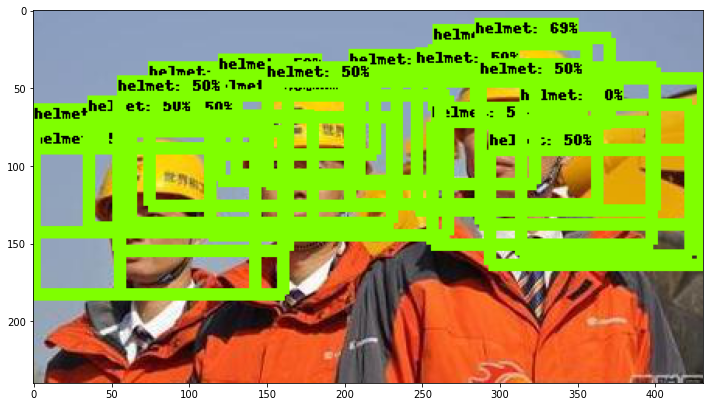

In [22]:
# Use the captured photo to make predictions
%matplotlib inline

import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as PImage
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util

# Load the labels
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_PATH, use_display_name=True)

# Load the model
path_to_frozen_graph = os.path.join(EXPORTED_PATH, 'frozen_inference_graph.pb')
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(path_to_frozen_graph, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    image = PImage.open('/content/TFJS-Custom-Detection/images/18.jpg')
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    (im_width, im_height) = image.size
    image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=(12, 8))
    plt.imshow(image_np)

#### **Convert the model into TFJS**
The model we exported works well with Python. However, to deploy it on the web browser, we need to convert it into TensorFlow.js so that it becomes compatible to be run directly on the browser

Also, the model only detects objects as the IDs specified in the `label_map.pbtxt`. Therefore, we also need to create a JSON list of all of our labels that can be mapped to the ID.

In [ ]:
!tensorflowjs_converter \
  --input_format=tf_frozen_model \
  --output_format=tfjs_graph_model \
  --output_node_names='Postprocessor/ExpandDims_1,Postprocessor/Slice' \
  --quantization_bytes=1 \
  --skip_op_check \
  $EXPORTED_PATH/frozen_inference_graph.pb \
  /content/model_web

import json

from object_detection.utils.label_map_util import get_label_map_dict

label_map = get_label_map_dict(LABEL_MAP_PATH)
label_array = [k for k in sorted(label_map, key=label_map.get)]

with open(os.path.join('/content/model_web', 'labels.json'), 'w') as f:
  json.dump(label_array, f)

!cd /content/model_web && zip -r /content/model_web.zip *

#### **Download the model**
The TFJS model is now ready to be downloaded.

> **Note:** Sometimes this command doesn't run or it will throw an error. Just try running it again.

You can also download the model by right clicking on the `model_web.zip` file in the left sidebar file inspector.

In [ ]:
from google.colab import files
files.download('/content/model_web.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>